Importing the Dependecnies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Preprocessing

In [3]:
# loading the data from csv to pandas dataframe
car_dataset = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [6]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
# checking the number of missin values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical data

In [9]:
# encoding 'Fuel_type' column
car_dataset.replace({'fuel':{'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace=True)

# encoding 'seller_type' column
car_dataset.replace({'seller_type':{'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace=True)

# encoding 'transmission' column
car_dataset.replace({'transmission':{'Manual': 0, 'Automatic': 1}}, inplace=True)

# encoding 'owner' column
car_dataset.replace({'owner':{'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace=True)

In [10]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


Splitting the Data and Target

In [11]:
X = car_dataset.drop(['name','selling_price'], axis=1)
Y = car_dataset['selling_price']

In [12]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [13]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Train Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 6) (3472, 6) (868, 6)


Model Training

1. Linear Regression

In [16]:
# loading the linear regession model
lin_red_model = LinearRegression()

In [17]:
lin_red_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [18]:
# prediction on Training data
training_data_prediction = lin_red_model.predict(X_train)

In [19]:
# R sqaure Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R sqaure Error: ', error_score)

R sqaure Error:  0.43922410637048914


Visualize the actual price es and predicted prices

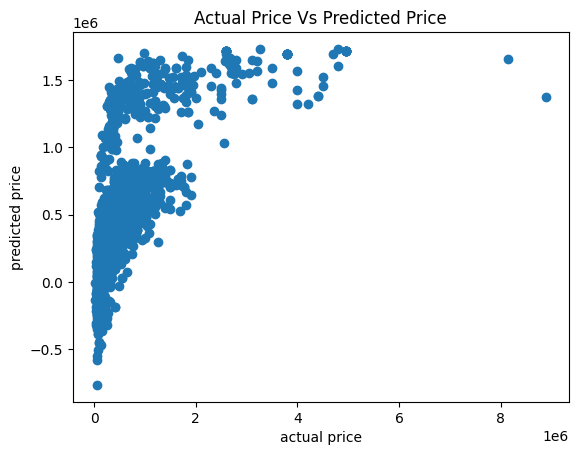

In [20]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [21]:
# prediction on testing data
test_data_prediction = lin_red_model.predict(X_test)

In [22]:
# R sqaure Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R sqaure Error: ', error_score)

R sqaure Error:  0.49988298730549385


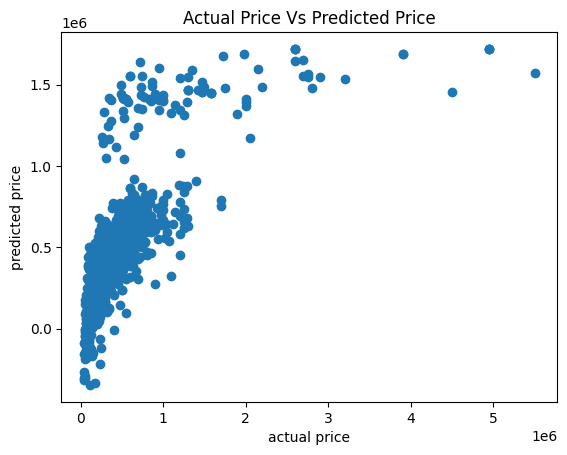

In [23]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

2. Lasso Regression

In [25]:
# loading the linear regession model
lass_red_model = Lasso()

In [26]:
lass_red_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [27]:
# prediction on Training data
training_data_prediction = lass_red_model.predict(X_train)

In [28]:
# R sqaure Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R sqaure Error: ', error_score)

R sqaure Error:  0.4392241063188461


Visualize the actual price es and predicted prices

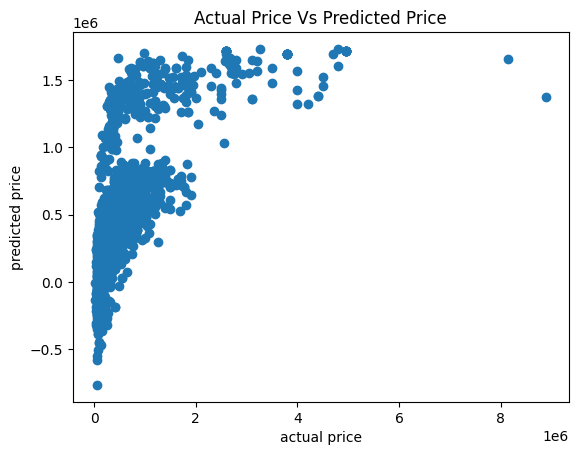

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [33]:
# prediction on testing data
test_data_prediction = lass_red_model.predict(X_test)

In [34]:
# R sqaure Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R sqaure Error: ', error_score)

R sqaure Error:  0.49988271066297707


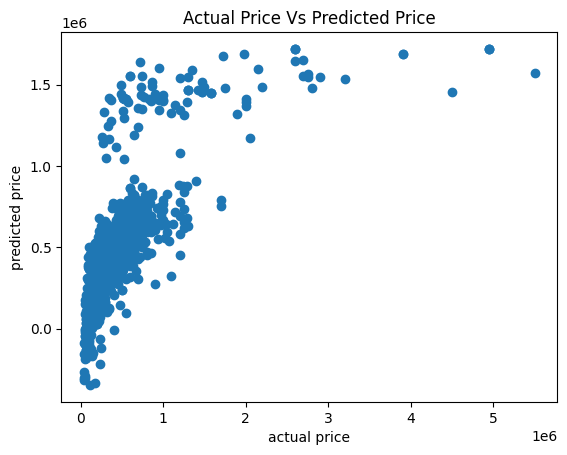

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()